<div class="alert alert-info">
<h2> Комментарий студента </h2>

Привет, Дарина 🖐! Это второй раз когда ты заходишь в мой проект "Декаомпозиция". 
К сожалению, твой первый комментарий не сохранился, я сделал следующую глупость:
1. делал проект на локалке
2. залил на практикум, ты проверила
3. исправил и нажал "отправить на повторную проверку"
4. захотел доработать отправленное, но скачать уже нельзя, можно загрузить только заново

Суть твоего первого комментария - сделай подробней.
Принято :) Я постарался доработать.

</div>

---

<font color="green">Комментарий тимлида</font>

Привет, Максим! Спасибо тебе за доработу!

Бывает -- главное с проектом так не делай))

По поводу доработок все ок, ясно что ты собираешься делать -- можно приступать)

---

<font color="green">Комментарий тимлида</font>

Привет, это Женя! Спасибо тебе за работу!


По ходу тетрадки ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий тимлида». Постарайся учесть эти комментарии для дальнейших проектов.

Пожалуйста, не удаляй комментарии.

---

Я буду красить комментарии цветом:

<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---

# Презентация: 
https://www.dropbox.com/s/048npx522s7ynts/Final.pdf?dl=0

# Dashboard: 
https://public.tableau.com/views/Final_project_16192965703030/Spacebrothers?:language=en&:display_count=y&publish=yes&:origin=viz_share_link

In [1]:
# import basics
import pandas as pd
import numpy as np
import datetime as dt
import math as mth
import time
import requests
import json
from IPython.display import Latex
from scipy import stats as st

# inport plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go
from plotly.subplots import make_subplots

# make better view for tables
from IPython.display import display
from IPython.core.display import HTML
from IPython.display import Image

# wide display
#pd.set_option('max_colwidth', 1000)

# change the window size
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set settings for display option
pd.set_option('display.max_columns', 500)

# import ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Описание проекта / Project Description
<a id='Начало'></a>
<a id='Описание проекта'></a>

Компания «Космические братья» занимается развитием и продвижением мобильного игрового приложения.
В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.
Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

Игра уже пользуется большой популярностью — настало время на ней зарабатывать. 
Так что первой задачей будет расчёт модели монетизации сервиса. 
Космические братья — бесконечность беспредельна!

# Описание данных / Data description
<a id='Описание данных'></a>

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.


**game_actions.csv** — основной датасет;

Текущие поля в датасете:
- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет **ad_cost.csv** содержит колонки:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет **user_source.csv** содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

# Декомпозиция проекта / Decomposition of the project
<a id='Декомпозиция проекта'></a>

**Задача: Сформировать модель монетизации игрового приложения**

1. Произвести чтение и обработку данных:
    - найти пропуски и заполнить 
    - найти дубликаты
    - проверить корректность типа данных


2. Провести исследовательский анализ данных (EDA) 
    - найти и объяснить целевое событие 
    - объяснить время наступления целевого события
    - Когда пользователь делает первую постройку
    - Когда пользователь достигает первого уровня
    - Когда пользователи приходят
    - Когда пользователи уходят
    - задать сценарий работы, когда прибыль 0% и когда прибыль 30% и вывести целевые метрики:
        - Costs
        - User Acquisition
        - Cost Per Acquisition
        - Retention
        - Lifetime (LT)
        - Profit
        - Revenue
        - ARPU 
        - Margin


3. Проанализировать влияние событий на совершение целевого события
    - найти и объяснить лучшие каналы привлечения трафика
    - найти и объяснить как каналы связаны с нашими метриками и целевым событием


4. Проверить статистические гипотезы
 - *Проверьте гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.*
 - *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных* (будет сформирована в процессе работы с данными). Предполагаю, что нужно проверить гипотезу о равенстве жизненного цикла пользователей, которые достигли первого уровня и которые не достигли первого уровня.


5. Сформулировать выводы и сделать рекомендации по монетизации
    - сформировать вывод в какой момент пользователю показать рекламу или предложить покупку
    - сформировать вывод в какая должна быть цена показа рекламы или цена покупки пользователя
    - найти и объяснить лучшие каналы привлечения трафика


6. Подготовить презентацию
    - выводы + графики

# Чтение и обработка данных / Data reading
<a id='Чтение и обработка данных'></a>

In [2]:
%%time
#read csv files

ad_costs = pd.read_csv('ad_costs.csv', sep=',') # локальный адрес
game_actions = pd.read_csv('game_actions.csv', sep=',') # локальный адрес
user_source = pd.read_csv('user_source.csv', sep=',') # локальный адрес


CPU times: user 256 ms, sys: 21.4 ms, total: 277 ms
Wall time: 2.49 s


Датасет **ad_cost.csv**

In [3]:
%%time
display(ad_costs.sample(5))
print(ad_costs.info())

,source,day,cost
8,instagram_new_adverts,2020-05-04,502.925451
15,yandex_direct,2020-05-04,554.651494
6,facebook_ads,2020-05-09,38.723350
12,instagram_new_adverts,2020-05-08,71.578739
17,yandex_direct,2020-05-06,180.917099


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
None
CPU times: user 16.3 ms, sys: 951 µs, total: 17.2 ms
Wall time: 14.6 ms


Датасет **user_source.csv**

In [4]:
%%time
display(user_source.sample(5))
print(user_source.info())

,user_id,source
11984,e1f95466-ce2e-4bc9-bcac-f5fec413f50c,youtube_channel_reklama
11870,dff698ca-eead-4c93-b143-1961d5ecc377,yandex_direct
1677,1e39086e-6d21-4fb8-a091-4eba92aa8462,youtube_channel_reklama
5543,67115d61-677f-479a-adef-012cfa63d334,instagram_new_adverts
6536,798816e1-5751-4ab2-9bbd-e713b6bfaf12,instagram_new_adverts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB
None
CPU times: user 13.8 ms, sys: 361 µs, total: 14.1 ms
Wall time: 12.4 ms


Датасет **game_actions.csv**

In [5]:
%%time
display(game_actions.sample(5))
print(game_actions.info())

,event_datetime,event,building_type,user_id,project_type
99607,2020-05-13 16:04:17,building,spaceport,b3214d24-b741-4023-a6fc-0bbe342869db,NaN
64173,2020-05-10 01:38:29,building,spaceport,7b0be0b6-1bfe-434b-9ff2-46b73feb8c80,NaN
31848,2020-05-07 10:34:35,building,spaceport,fb197815-bd60-4f6e-9227-3466e9d8ce4f,NaN
5926,2020-05-04 17:40:45,building,assembly_shop,971b8250-1ff3-4bf0-9ec1-1776c263e837,NaN
54317,2020-05-09 08:06:40,building,assembly_shop,a302aa3e-efda-4d7d-bdb8-3c03146e0c67,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB
None
CPU times: user 54.6 ms, sys: 446 µs, total: 55 ms
Wall time: 50.8 ms


**Подготовим данные**

In [6]:
%%time
# исходные DF оставим без изменений, будем работать с копиями и добавим литеру "C"

ad_costs_C = ad_costs.copy() # локальный адрес
game_actions_C = game_actions.copy() # локальный адрес
user_source_C = user_source.copy() # локальный адрес

CPU times: user 14.4 ms, sys: 481 µs, total: 14.9 ms
Wall time: 14 ms


In [7]:
%%time
# приведем к формату времени
ad_costs_C['day'] = pd.to_datetime(ad_costs_C['day'], format='%Y-%m-%d')
game_actions_C['event_datetime'] = pd.to_datetime(game_actions_C['event_datetime'], format='%Y-%m-%d %H:%M:%S')

CPU times: user 56.1 ms, sys: 0 ns, total: 56.1 ms
Wall time: 54.9 ms


In [8]:
%%time
# проверим дубликаты
print('DF ad_costs =', ad_costs_C.duplicated().sum())
print('DF game_actions =', game_actions_C.duplicated().sum())
print('DF ser_source =', user_source_C.duplicated().sum())

DF ad_costs = 0
DF game_actions = 1
DF ser_source = 0
CPU times: user 97.2 ms, sys: 4.52 ms, total: 102 ms
Wall time: 96 ms


In [9]:
%%time
# посмотрим на дубликаты
game_actions_C[game_actions_C.duplicated()]

CPU times: user 75.7 ms, sys: 0 ns, total: 75.7 ms
Wall time: 73.9 ms


,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [10]:
%%time
game_actions_C.query('user_id == "c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af"').head()

CPU times: user 7.16 ms, sys: 7.09 ms, total: 14.3 ms
Wall time: 28.5 ms


,event_datetime,event,building_type,user_id,project_type
15950,2020-05-05 20:34:11,building,assembly_shop,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
24861,2020-05-06 18:44:36,building,assembly_shop,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
42819,2020-05-08 09:43:44,building,assembly_shop,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
46859,2020-05-08 17:39:07,building,assembly_shop,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
59875,2020-05-09 18:14:20,building,assembly_shop,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [11]:
%%time
# удалим дубликаты
game_actions_C = game_actions_C.drop_duplicates()
game_actions_C.head()

CPU times: user 120 ms, sys: 0 ns, total: 120 ms
Wall time: 190 ms


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


**Посмотрим на пропуски**

Пропуски есть в датасете `game_actions_C` в столбцах `building_type` и `project_type`

In [12]:
game_actions_C

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Данные достаточно чистые, был один дубль, что не страшно) Пропуски тоже логичны
</div>


In [13]:
%%time
# зададим функцию, которая меняет значение ячеек исходя из третьего правила выше
def replace_3(row):
    if row['event'] == 'finished_stage_1':
        return 1
    else:
        return 0

# произведем замену значений в DF
game_actions_C['user_level'] = game_actions_C.apply(replace_3, axis = 1)
game_actions_clean = game_actions_C.copy() # чистая копия
game_actions_C.head()

CPU times: user 3.18 s, sys: 14.1 ms, total: 3.19 s
Wall time: 3.36 s


,event_datetime,event,building_type,user_id,project_type,user_level
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,0
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,0
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,0
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,0


In [14]:
game_actions_C[(game_actions_C['user_level'] == 1) & (game_actions_C['event'] == "finished_stage_1")]

,event_datetime,event,building_type,user_id,project_type,user_level
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,1
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,1
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,1
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,1
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,1
...,...,...,...,...,...,...
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN,1
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,1
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,1
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,1


In [15]:
game_actions_C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 6 columns):
event_datetime    135639 non-null datetime64[ns]
event             135639 non-null object
building_type     127956 non-null object
user_id           135639 non-null object
project_type      1866 non-null object
user_level        135639 non-null int64
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 7.2+ MB


# Выводы чтение и обработка данных / Conclusions Data reading and data processing
<a id='Выводы чтение и обработка данных'></a>

DF `ad_costs`:
 - дубликатов нет
 - неверный тип данных столбца "day"
 - NA отсутствуют

DF `user_source`:
 - дубликатов нет
 - типы данных корректные
 - NA отсутствуют

DF `game_actions`:
 - обнаружен 1 дубликат
 - тип данных столбца "event_datetime" неверный
 - имемм NA в столбцах "building_type" и "project_type", пропуски заполнять не требуется, т.к. в дальнейшей работе не используются.

**Исправления**
1. создан DF `game_actions_С` без дубликатов, добавлены пользовательские уровни.
2. создан DF `user_sources_С` копия `user_source`
3. создан DF `ad_costs_С` с корректным типом данных 

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Данные готовы - можно приступать к анализу
</div>


# Исследовательский анализ данных (EDA) / Exploratory Data Analysis (EDA)
<a id='исследовательский анализ данных (EDA)'></a>

**найти и объяснить целевое событие:**

Наша цель - заработать денег. Для этого необходимо найти целевое событие, от которого будет зависеть наша модель.
Логично предположить, что целевое событие - это факт покупки/подписки/показа, т.е. действие приносящее деньги компании. 
Есть несколько способов, как эти деньги заработать:
 - Premium — Модель, при которой для неограниченных возможностей игры необходимо оплатить фиксированную сумму в сторе. Такая модель популярна среди бизнес-приложений и образовательных программ, а вот в игровой индустрии она генерирует меньше 10% выручки на мобильном рынке. Нам не подходит. 
 - Freemium — условно-бесплатная модель с ограниченным доступом. Суть модели простая: базовые возможности приложения предоставляются бесплатно, а за расширенные необходимо доплатить. Это вызывает негатив у тех, кто привык рассчитывать только на свои силы. Не самый лучший вариант.
 - Free-to-Play — условно-бесплатная модель с внутриигровыми покупками. Самая востребованная бизнес-модель в мобильных играх. На текущий момент на неё приходится 90% выручки на рынке. Супер, но давайте еще посмотрим что есть.
 - Subscribe — подписка. Суть модели: пользователь платит определённую сумму раз в месяц/год и получает доступ ко всему игровому контенту на этот период. Модель популярна для сервисов, которые интегрируются в повседневную жизнь пользователей – музыкальные сервисы. Не то пальто. 
 - Рекламная модель. Пользователи приложений со встроенной рекламой платят за расширенную функциональность своим временем — приложение предлагает получить внутриигровой бонус за просмотр ролика. Допустимый вариант. 
 - Пожертвования и краудфандинг. Мы не привыкли ждать у моря погоды. 

Итого: 

1. компания решила сфокусироваться на рекламной модели - просмотр ролика, но стоит отметить, что модель Free-to-Play также хороша и ее можно использовать.

2. в рекламной модели целевое событие - показ рекламы пользователю, в этот момент мы зарабатываем деньги от рекламодателя. 

3. nеперь необходимо определить оптимальное время наступления данного события и факторы на него влияющие.

**Когда пользователи приходят и уходят**

In [16]:
%%time
# дата старта и окончания каждого пользователя
min_max_user_date = game_actions_C.sort_values(by = ['event_datetime','user_id'], ascending = True) \
                                  .pivot_table(index = ['user_id'], 
                                               values = 'event_datetime', 
                                               aggfunc = {'min','max'}) \
                                  .reset_index()

# найдем продолжительность использования приложения для каждого пользователя
min_max_user_date['life'] = min_max_user_date['max'] - min_max_user_date['min']
min_max_user_date['life'] = min_max_user_date['life'] / pd.to_timedelta(1, unit='D')
min_max_user_date

CPU times: user 145 ms, sys: 35.9 ms, total: 181 ms
Wall time: 196 ms


,user_id,max,min,life
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-20 11:26:06,2020-05-06 01:07:37,14.429502
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-18 10:46:52,2020-05-06 03:09:12,12.317824
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-14 09:21:27,2020-05-05 18:08:52,8.633738
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47,2020-05-05 21:02:05,6.443542
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-22 02:46:45,2020-05-05 13:49:58,16.539433
...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11 22:15:54,2020-05-04 01:58:59,7.845081
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-14 10:11:36,2020-05-04 11:58:14,9.925949
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-12 13:01:52,2020-05-04 02:05:09,8.456053
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-11 22:04:30,2020-05-04 20:28:28,7.066690


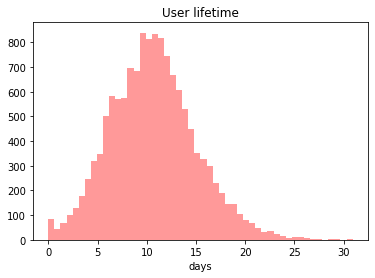

In [17]:
sns.distplot( min_max_user_date['life'], hist=True, kde=False, rug=False, color="red" ).set_title('User lifetime');
plt.xlabel("days");

**Живут пользователи от 0 почти до 30 дней, в среднем 10-15 дней**

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида

Непонятно, о чем график - ни заголовков/подписей, ни комментария
</div>


<div class="alert alert-info">
<h2> Комментарий студента </h2>
Исправил
</div>

In [18]:
min_max_user_date['life'].describe()

count    13576.000000
mean        10.675782
std          4.350471
min          0.000000
25%          7.690032
50%         10.521441
75%         13.311713
max         30.915891
Name: life, dtype: float64

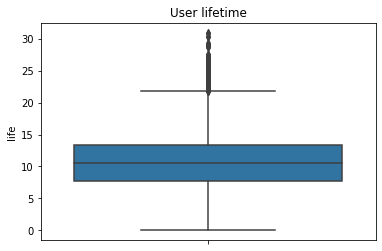

In [19]:
sns.boxplot(y=min_max_user_date['life']).set_title('User lifetime')
plt.show()

In [20]:
print('медианная продолжительность жизни пользователя на первом уровне', np.round(min_max_user_date['life'].median(),2))

медианная продолжительность жизни пользователя на первом уровне 10.52


<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Ок
</div>


**Когда пользователь делает первую постройку**


In [21]:
first_build = game_actions_C.merge(min_max_user_date[['user_id','min']], left_on='user_id', right_on='user_id')
first_build['duration'] = first_build['event_datetime'] - first_build['min']
first_build['duration'] = np.round(first_build['duration'] / pd.to_timedelta(1, unit='D'),2)
first_build.head(5)

,event_datetime,event,building_type,user_id,project_type,user_level,min,duration
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,0.00
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,1.22
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,1.81
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,1.87
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,2.04


In [22]:
first_build_start = first_build.pivot_table(index = ['user_id', 'duration'], values = 'event_datetime', aggfunc = 'min').reset_index()
first_build_start.head()

,user_id,duration,event_datetime
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,0.00,2020-05-06 01:07:37
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,0.43,2020-05-06 11:31:56
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,0.59,2020-05-06 15:11:50
3,0001f83c-c6ac-4621-b7f0-8a28b283ac30,3.20,2020-05-09 05:59:57
4,0001f83c-c6ac-4621-b7f0-8a28b283ac30,3.27,2020-05-09 07:35:40


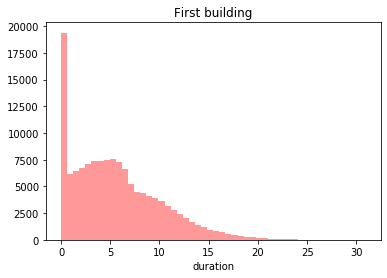

In [23]:
sns.distplot(first_build_start['duration'], hist=True, kde=False, rug=False, color="red").set_title('First building');

In [24]:
first_build_start['duration'].describe()

count    135124.000000
mean          5.602025
std           4.483096
min           0.000000
25%           2.020000
50%           4.910000
75%           8.330000
max          30.920000
Name: duration, dtype: float64

In [25]:
print('медианная время завершения первой постройки', np.round(first_build_start['duration'].median(),2))

медианная время завершения первой постройки 4.91


<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Довольно долго
</div>


**Когда пользователь достигает первого уровня**


In [26]:
first_level = first_build.query('user_level == 1').pivot_table(index = ['user_id', 'duration'], values = 'event_datetime', aggfunc = 'min').reset_index()
first_level.head()

,user_id,duration,event_datetime
0,001d39dc-366c-4021-9604-6a3b9ff01e25,6.44,2020-05-12 07:40:47
1,003ee7e8-6356-4286-a715-62f22a18d2a1,12.55,2020-05-17 21:47:49
2,004074f8-251a-4776-922c-8348dca1a2f6,12.78,2020-05-16 19:57:40
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,11.31,2020-05-15 16:02:01
4,0056c007-c082-43cc-bdef-afc49bca4cb9,6.08,2020-05-16 13:48:39


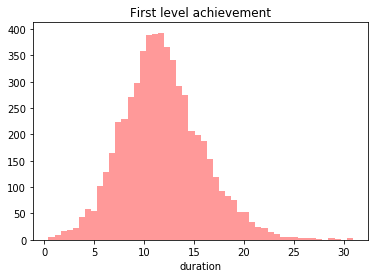

In [27]:
sns.distplot(first_level['duration'], hist=True, kde=False, rug=False, color="red").set_title('First level achievement');

**Большва часть пользователей достигает 1го уровня от 10 до 15 дней**

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида

Непонятно, о чем график - ни заголовков/подписей, ни комментария
</div>


<div class="alert alert-info">
<h2> Комментарий студента </h2>
Исправил
</div>

In [28]:
first_level['duration'].describe()

count    5817.000000
mean       11.859654
std         4.067722
min         0.400000
25%         9.220000
50%        11.560000
75%        14.220000
max        30.920000
Name: duration, dtype: float64

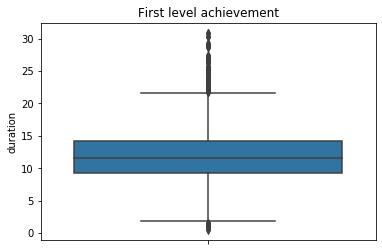

In [29]:
sns.boxplot(y=first_level['duration']).set_title('First level achievement')
plt.show()

In [30]:
print('медианная время завершения певого уроня', np.round(first_level['duration'].median(),2))

медианная время завершения певого уроня 11.56


<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Тоже довольно долго для мобильной игры. Во многих играх первый уровень проходят еще в обучении. Возможно, мы слишком усложнили процесс

</div>


**Посмотрим какой этап прохождения самый долгий и где застревают пользователи**

In [31]:
first_build.head(5)

,event_datetime,event,building_type,user_id,project_type,user_level,min,duration
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,0.00
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,1.22
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,1.81
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,1.87
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,2.04


In [32]:
%%time
stage = [] # лист для счетчиков
counter = 0 # счетчик построек/шагов
stage.append(counter)
stage_duration = [] # лист для продолжительности постройки
stage_duration.append((first_build.loc[0,'event_datetime'] - first_build.loc[0,'min']) / pd.to_timedelta(1, unit='D'))

    
for i in range(len(first_build['user_id'])-1):
    if first_build.loc[i+1,'user_id'] == first_build.loc[i,'user_id']:
        counter += 1
        stage.append(counter)
        build_time = np.round(first_build.loc[i+1,'duration'] - first_build.loc[i,'duration'],2)
        stage_duration.append(build_time)
    else:
        counter = 0
        stage.append(counter)
        build_time = np.round((first_build.loc[i+1,'event_datetime'] - first_build.loc[i+1,'min']) / pd.to_timedelta(1, unit='D'),2)
        stage_duration.append(build_time)

CPU times: user 9.15 s, sys: 2.62 ms, total: 9.15 s
Wall time: 9.17 s


In [33]:
first_build['stage'] = stage
first_build['stage_duration'] = stage_duration
first_build.head(5)

,event_datetime,event,building_type,user_id,project_type,user_level,min,duration,stage,stage_duration
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,0.00,0,0.00
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,1.22,1,1.22
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,1.81,2,0.59
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,1.87,3,0.06
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-04 00:00:01,2.04,4,0.17


In [34]:
first_build.pivot_table(index= 'stage', values = 'stage_duration', aggfunc = {'median','count'})

,count,median
stage,,
0,13576,0.000
1,13519,0.990
2,13290,0.890
3,12786,0.800
4,12071,0.780
5,11124,0.770
6,9878,0.780
7,9349,0.790
8,8788,0.780


In [35]:
report = first_build.groupby('stage')['user_id'].nunique()
report = report.to_frame()
report = report.rename(columns = {'user_id': 'nuniq_users'})
report['shift'] = report['nuniq_users'].shift(1)
report['ratio'] = np.round(report['nuniq_users'] / report['shift'],2)
report['end_ratio'] = np.round(report['nuniq_users'] / report['nuniq_users'].max(),2)
report

,nuniq_users,shift,ratio,end_ratio
stage,,,,
0,13576,NaN,NaN,1.00
1,13519,13576.0,1.00,1.00
2,13290,13519.0,0.98,0.98
3,12786,13290.0,0.96,0.94
4,12071,12786.0,0.94,0.89
5,11124,12071.0,0.92,0.82
6,9878,11124.0,0.89,0.73
7,9349,9878.0,0.95,0.69
8,8788,9349.0,0.94,0.65


In [36]:
find_stage = first_build.pivot_table(index= 'stage', 
                                     values = 'stage_duration', 
                                     aggfunc = {'median','count'}).reset_index().drop('stage', axis = 1)
find_stage['median'].cumsum()

0      0.000
1      0.990
2      1.880
3      2.680
4      3.460
5      4.230
6      5.010
7      5.800
8      6.580
9      7.330
10     8.120
11     8.850
12     9.620
13    10.370
14    11.190
15    11.940
16    12.710
17    13.390
18    14.055
19    14.775
20    15.395
21    16.135
Name: median, dtype: float64

**объяснить время наступления целевого события**


1. медианная продолжительность жизни пользователя на первом уровне 10.52, т.е. за это время мы должны успет завлечь пользователя в игру.
2. чаще всего пользователь делает первую постройку сразу, половина пользователей спустя почти 5 дней.
3. медианная продолжительность первого уровня 11.56 дней, т.е. большая часть пользователей уходит из игры, не завершив первый уровень.
4. Каждый последующий этап довольно хорошо сбалансирован и пользователи проходят за 0.7-1 день. 

Какие проблемы заметны:

- 11% пользователей не могут завершить 4ый этап
- 27% пользователей не могут завершить 6ой этап
- 43% не могут завершить 9й этап
- 52% не могут завершить 10ый этап
- 59% - 86% не могут завершить с 11 по 14ый этапы

поэтому чтобы удерживать пользователя рекомендуется показывать рекламу в следующем порядке после входа пользователя:

In [37]:
print('Первый показ рекламы на этапе 4, примерно через -', np.round(find_stage['median'].cumsum()[4],2),'дня')
print('Второй показ рекламы на этапе 6, примерно через -', np.round(find_stage['median'].cumsum()[6],2),'дня')
print('Третий показ рекламы на этапе 9, примерно через -', np.round(find_stage['median'].cumsum()[9],2),'дня')
print('Четвертый показ рекламы на этапе 10, примерно через -', np.round(find_stage['median'].cumsum()[10],2),'дня')
print('Пятый показ рекламы на этапе 11, примерно через -', np.round(find_stage['median'].cumsum()[11],2),'дня')
print('Шестой показ рекламы на этапе 12, примерно через -', np.round(find_stage['median'].cumsum()[12],2),'дня')
print('Седьмой показ рекламы на этапе 13, примерно через -', np.round(find_stage['median'].cumsum()[13],2),'дня')

Первый показ рекламы на этапе 4, примерно через - 3.46 дня
Второй показ рекламы на этапе 6, примерно через - 5.01 дня
Третий показ рекламы на этапе 9, примерно через - 7.33 дня
Четвертый показ рекламы на этапе 10, примерно через - 8.12 дня
Пятый показ рекламы на этапе 11, примерно через - 8.85 дня
Шестой показ рекламы на этапе 12, примерно через - 9.62 дня
Седьмой показ рекламы на этапе 13, примерно через - 10.37 дня


<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Хорошая идея! Так мы не покажем рекламу слишком рано
</div>


**Проверим затраты на маркетинг**

In [38]:
marketing = ad_costs_C.pivot_table(index = ['day'], columns = 'source', values = 'cost', aggfunc = 'sum' ).reset_index()
marketing

source,day,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
0,2020-05-03,935.882786,943.204717,969.139394,454.224943
1,2020-05-04,548.354480,502.925451,554.651494,259.073224
2,2020-05-05,260.185754,313.970984,308.232990,147.041741
3,2020-05-06,177.982200,173.071145,180.917099,88.506074
4,2020-05-07,111.766796,109.915254,114.429338,55.740645
5,2020-05-08,68.009276,71.578739,62.961630,40.217907
6,2020-05-09,38.723350,46.775400,42.779505,23.314669


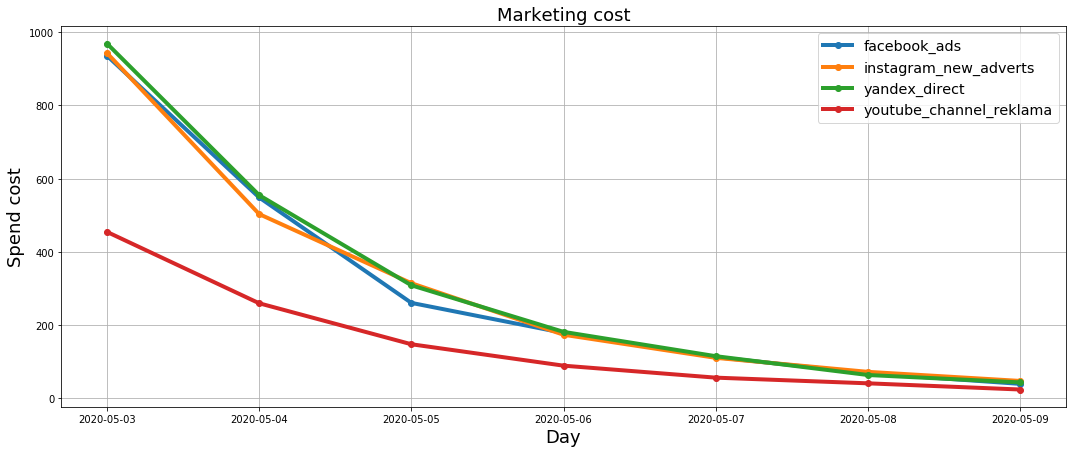

In [39]:
plt.figure(figsize=(18, 7))
plt.grid(True)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Spend cost', fontsize=18)
plt.title('Marketing cost', fontsize=18)


for i in ['facebook_ads','instagram_new_adverts', 'yandex_direct', 'youtube_channel_reklama']:
        plt.plot('day', 
                 i, 
                 data=marketing, 
                 marker='o', 
                 linewidth=4,
                 label = i
                )
plt.legend(fontsize = 'x-large');

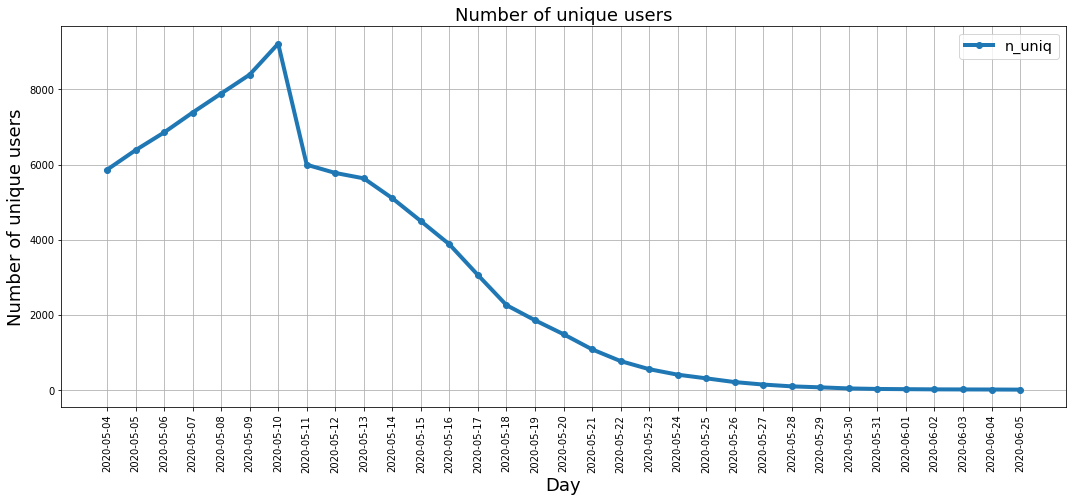

In [40]:
game_actions_C['event_datetime'] = game_actions_C['event_datetime'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
users_came = game_actions_C.groupby(['event_datetime'])['user_id'].nunique().reset_index()
users_came.columns = ['event_datetime', 'n_uniq']

plt.figure(figsize=(18, 7))
plt.grid(True)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Number of unique users', fontsize=18)
plt.title('Number of unique users', fontsize=18)


plt.plot('event_datetime',
         'n_uniq', 
         data=users_came, 
         marker='o', 
         linewidth=4
        )
plt.legend(fontsize = 'x-large');
plt.xticks(rotation=90);

Пользователи начали приходить на следующий день после запуска маркетинговой компании, вероятнее всего деньги поступили на площадку в течение 1 рабочего дня.

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Да, вполне вероятно, что у нас была предоплата
</div>


In [41]:
by_channel = game_actions_C.groupby(['event_datetime','user_id'])['event'].count().reset_index()
by_channel = game_actions_C.merge(user_source_C, left_on='user_id', right_on='user_id')
by_channel = by_channel.pivot_table(index = ['event_datetime'], columns = 'source', values = 'user_id', aggfunc = 'nunique' ).reset_index()
by_channel.head()

source,event_datetime,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
0,2020-05-04,1184.0,1452.0,2078.0,1146.0
1,2020-05-05,1328.0,1539.0,2291.0,1224.0
2,2020-05-06,1389.0,1670.0,2445.0,1350.0
3,2020-05-07,1535.0,1802.0,2613.0,1434.0
4,2020-05-08,1583.0,1962.0,2784.0,1562.0


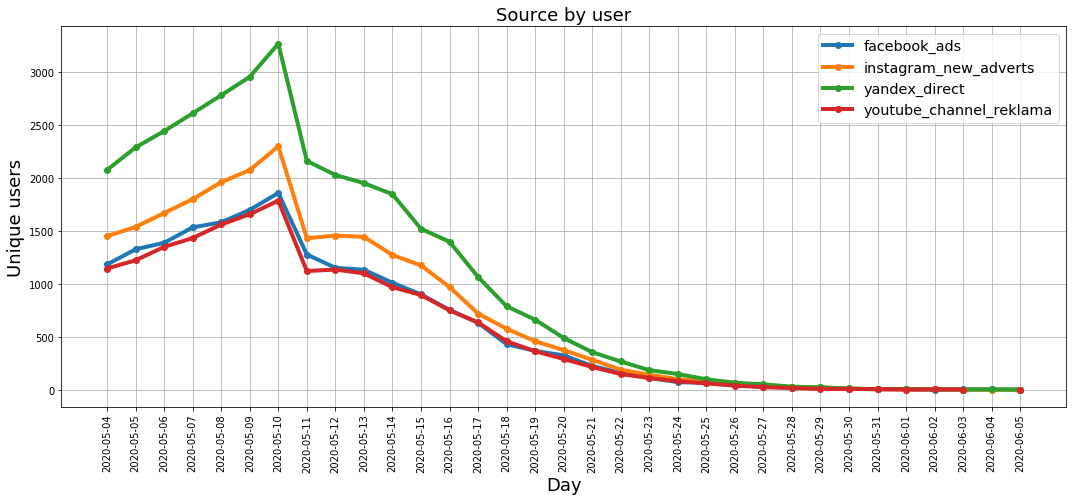

In [42]:
plt.figure(figsize=(18, 7))
plt.grid(True)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Unique users', fontsize=18)
plt.title('Source by user', fontsize=18)


for i in ['facebook_ads','instagram_new_adverts', 'yandex_direct', 'youtube_channel_reklama']:
        plt.plot('event_datetime', 
                 i, 
                 data=by_channel, 
                 marker='o', 
                 linewidth=4,
                 label = i
                )
plt.legend(fontsize = 'x-large');
plt.xticks(rotation=90);

**На графике видно, что пользователей больше всего приходит с Яндекс Директа и Инстаграм, с Ютуб и Фейбука приходят реже, но это не означает, что данные каналы менее эффективны**

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида

Хочется комментарий увидеть здесь
</div>


<div class="alert alert-info">
<h2> Комментарий студента </h2>
Исправил
</div>

**Посчитаем метрики**

In [43]:
def metrics(Rate):

    # Global metrics
    Margin = Rate * 100
    Costs = ad_costs_C['cost'].sum() # общие затраты
    Revenue = np.round(Costs * (1 + Rate),2) # выручка
    Profit = np.round(Revenue - Costs,2) # прибыль
    N_unique = game_actions_C['user_id'].nunique() # количество уникальных пользователей
    CPAcq = np.round(Costs / N_unique,2) # затраты на пользователя Cost Per Acquisition
    ARPU = np.round(Revenue / N_unique,2) # доход с пользователя 
    SC = np.round(ARPU / 7,3) # стоимость 1 показа рекламы одному пользователю

    print('--- Расчет при сценарии Margin = {:.2%} ---'.format(Rate))
    print('Profit =',Profit)
    print('CPAcq =',CPAcq)
    print('ARPU =',ARPU)
    print('Прибыль / Убыток с пользователя =', np.round(ARPU - CPAcq,2))
    print('стоимость 1 показа рекламы одному пользователю = ', SC)
    print()

#Retention
#Lifetime (LT) 

In [44]:
# расчет различных сценариев
for i in np.arange(0.0, 0.5, 0.1):
    metrics(i)

--- Расчет при сценарии Margin = 0.00% ---
Profit = 0.0
CPAcq = 0.56
ARPU = 0.56
Прибыль / Убыток с пользователя = 0.0
стоимость 1 показа рекламы одному пользователю =  0.08

--- Расчет при сценарии Margin = 10.00% ---
Profit = 760.35
CPAcq = 0.56
ARPU = 0.62
Прибыль / Убыток с пользователя = 0.06
стоимость 1 показа рекламы одному пользователю =  0.089

--- Расчет при сценарии Margin = 20.00% ---
Profit = 1520.71
CPAcq = 0.56
ARPU = 0.67
Прибыль / Убыток с пользователя = 0.11
стоимость 1 показа рекламы одному пользователю =  0.096

--- Расчет при сценарии Margin = 30.00% ---
Profit = 2281.07
CPAcq = 0.56
ARPU = 0.73
Прибыль / Убыток с пользователя = 0.17
стоимость 1 показа рекламы одному пользователю =  0.104

--- Расчет при сценарии Margin = 40.00% ---
Profit = 3041.43
CPAcq = 0.56
ARPU = 0.78
Прибыль / Убыток с пользователя = 0.22
стоимость 1 показа рекламы одному пользователю =  0.111



<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Очень круто, что есть несколько расчетов! Менеджер будет в восторге
</div>


In [45]:
# User Acquisition metrics
game_actions_C['event_datetime'] = pd.to_datetime(game_actions_C['event_datetime'], format='%Y-%m-%d')
game_actions_C['session_month'] = game_actions_C['event_datetime'].dt.month
game_actions_C['session_week']  = game_actions_C['event_datetime'].dt.week
game_actions_C['session_date'] = game_actions_C['event_datetime'].dt.date
    
dau_total = int(game_actions_C.groupby('session_date').agg({'user_id': 'nunique'}).mean())
wau_total = int(game_actions_C.groupby(['session_week']).agg({'user_id': 'nunique'}).mean())
mau_total = int(game_actions_C.groupby(['session_month']).agg({'user_id': 'nunique'}).mean())
    
print('DAU =', dau_total)
print('WAU =', wau_total)
print('MAU =', mau_total)
    
#Retention
#Lifetime (LT) 

DAU = 2884
WAU = 6120
MAU = 6802


In [46]:
clean_user_activity = first_build.loc[:,['event_datetime', 'user_id', 'min']]
clean_user_activity.columns = ['activity_date', 'user_id', 'first_activity_date']

#получим день начала недели, т.е. начало недели относительно activity_date
clean_user_activity['activity_week'] = (pd.to_datetime(clean_user_activity['activity_date'], unit='d') - \
                                       pd.to_timedelta(clean_user_activity['activity_date'].dt.dayofweek, unit='d')).dt.date

#получим день начала недели, т.е. начало недели относительно first_activity_date
clean_user_activity['first_activity_week'] = (pd.to_datetime(clean_user_activity['first_activity_date'], unit='d') - \
                                              pd.to_timedelta(clean_user_activity['first_activity_date'].dt.dayofweek, unit='d')).dt.date



clean_user_activity.head(3)

,activity_date,user_id,first_activity_date,activity_week,first_activity_week
0,2020-05-04 00:00:01,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,2020-05-04,2020-05-04
1,2020-05-05 05:20:15,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,2020-05-04,2020-05-04
2,2020-05-05 19:24:02,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,2020-05-04,2020-05-04


<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида

Здесь, к сожалению, код спотыкается :с Пока не могу проверить дальше
</div>


<div class="alert alert-info">
<h2> Комментарий студента </h2>
    
Исправил, был вопрос версий.
Зашел через среду Практикума, поправил.
</div>

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Спасибо!
</div>


**рассчитаем Retention rate**

In [47]:
clean_user_activity['cohort_lifetime'] = clean_user_activity['activity_week'] - clean_user_activity['first_activity_week']
clean_user_activity['cohort_lifetime'] = (clean_user_activity['cohort_lifetime'] / np.timedelta64(1,'W')).astype('int')
clean_user_activity.head(3)

,activity_date,user_id,first_activity_date,activity_week,first_activity_week,cohort_lifetime
0,2020-05-04 00:00:01,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,2020-05-04,2020-05-04,0
1,2020-05-05 05:20:15,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,2020-05-04,2020-05-04,0
2,2020-05-05 19:24:02,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,2020-05-04,2020-05-04,0


In [48]:
#step_1
cohorts = clean_user_activity.groupby(['first_activity_week', 'cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()

#step_2
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_activity_week', 'user_id']]

#step_3
initial_users_count = initial_users_count.rename(columns = {'user_id':'cohort_users'})

#step_4
cohorts = cohorts.merge(initial_users_count,on='first_activity_week')

#step_5
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']

#step_6
retention_pivot = cohorts.pivot_table(index='first_activity_week',columns='cohort_lifetime',values='retention',aggfunc='sum') 

print(retention_pivot)

cohort_lifetime        0         1         2         3         4
first_activity_week                                             
2020-05-04           1.0  0.892826  0.320639  0.038377  0.002136


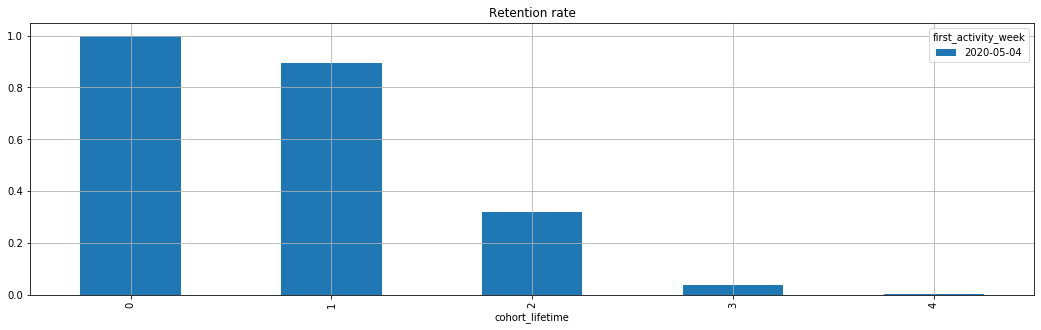

In [49]:
retention_pivot.T.plot.bar(figsize=(18, 5), grid = True, title = 'Retention rate');

## Выводы исследовательский анализ

Медианная продолжительность жизни пользователя на первом уровне 10.52, т.е. за это время мы должны успет завлечь пользователя в игру.

Чаще всего пользователь делает первую постройку сразу, половина пользователей спустя почти 5 дней.

Медианная продолжительность первого уровня 11.49 дней, т.е. большая часть пользователей уходит из игры, не завершив первый уровень.

Каждый последующий этап довольно хорошо сбалансирован и пользователи проходят за 0.7-1 день.

Какие проблемы заметны:

- 11% пользователей не могут завершить 4ый этап
- 27% пользователей не могут завершить 6ой этап
- 43% не могут завершить 9й этап
- 52% не могут завершить 10ый этап
- 59% - 86% не могут завершить с 11 по 14ый этапы

Поэтому чтобы удерживать пользователя рекомендуется показывать рекламу в следующем порядке после входа пользователя:

- Первый показ рекламы на этапе 4, примерно через - 3.46 дня
- Второй показ рекламы на этапе 6, примерно через - 5.01 дня
- Третий показ рекламы на этапе 9, примерно через - 7.33 дня
- Четвертый показ рекламы на этапе 10, примерно через - 8.12 дня
- Пятый показ рекламы на этапе 11, примерно через - 8.85 дня
- Шестой показ рекламы на этапе 12, примерно через - 9.62 дня
- Седьмой показ рекламы на этапе 13, примерно через - 10.37 дня


Рассчитаны затраты на маркетинг по 4 каналам:
- facebook_ads
- instagram_new_adverts
- yandex_direct
- youtube_channel_reklama

Маркетинговая компания длилась неделю, пользователи начали приходить на следующий день, меньше всего денег потратили на youtube_channel_reklama.

Пик прихода пользователей пришелся на 2020-5-10 (через неделю после окончания маркетинговой компании).

`yandex_direct` показывает лучшие показатели по отношению к `facebook_ads` и `instagram_new_adverts`.
сравнение между `Yandex` и `Youtube` пока не определено на данном этапе.

Рассчитаны 5 стратегий работы с маржинальностью (0%, 10%, 20%, 30% и 40%): 

--- Расчет при сценарии Margin = 0.00% ---
Profit = 0.0
CPAcq = 0.56
ARPU = 0.56
Прибыль / Убыток с пользователя = 0.0
стоимость 1 показа рекламы одному пользователю =  0.08

--- Расчет при сценарии Margin = 10.00% ---
Profit = 760.35
CPAcq = 0.56
ARPU = 0.62
Прибыль / Убыток с пользователя = 0.06
стоимость 1 показа рекламы одному пользователю =  0.089

--- Расчет при сценарии Margin = 20.00% ---
Profit = 1520.71
CPAcq = 0.56
ARPU = 0.67
Прибыль / Убыток с пользователя = 0.11
стоимость 1 показа рекламы одному пользователю =  0.096

--- Расчет при сценарии Margin = 30.00% ---
Profit = 2281.07
CPAcq = 0.56
ARPU = 0.73
Прибыль / Убыток с пользователя = 0.17
стоимость 1 показа рекламы одному пользователю =  0.104

--- Расчет при сценарии Margin = 40.00% ---
Profit = 3041.43
CPAcq = 0.56
ARPU = 0.78
Прибыль / Убыток с пользователя = 0.22
стоимость 1 показа рекламы одному пользователю =  0.111

Метрики пользователей:
- DAU = 2884
- WAU = 6120
- MAU = 6802

Retention rate
- 0 - 1.0
- 1 - 0.892826
- 2 - 0.320639
- 3 - 0.038377
- 4 - 0.002136



<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Крутые расчеты! Но я это уже говорила. Отличные выводы - все структурировано, есть с чем работать гейм-дизайнеру
Очень здорово что ты их собираешь вместе в каждом блоке - так если потребуется освежить в памяти результаты, это будет легко сделать 
</div>


# Проанализировать влияние событий на совершение целевого события


**найти и объяснить лучшие каналы привлечения трафика**

Какие варианты есть:
1. Доход от продаж (нет данных по продажам, не подходит)
2. Стоимость лида (нет данных по заказам, не подходит)
3. **Стоимость клиента,** `САС = Расходы на привлечение клиентов / Кол-во новых клиентов`
4. Окупаемость инвестиций (нет данных по продажам, не подходит)
5. Рентабельность расходов на рекламу (нет данных по продажам, не подходит)
6. Пожизненная ценность клиента (нет данных по заказам, не подходит)

In [50]:
marketing_efficiency = ad_costs_C.pivot_table(index = ['source'], values = 'cost', aggfunc = 'sum' ).reset_index()
marketing_efficiency

,source,cost
0,facebook_ads,2140.904643
1,instagram_new_adverts,2161.441691
2,yandex_direct,2233.111449
3,youtube_channel_reklama,1068.119204


In [51]:
n_unique_by_source = game_actions_C.merge(user_source_C, left_on='user_id', right_on='user_id')
n_unique_by_source = n_unique_by_source.groupby('source')['user_id'].nunique()
n_unique_by_source

source
facebook_ads               2726
instagram_new_adverts      3347
yandex_direct              4817
youtube_channel_reklama    2686
Name: user_id, dtype: int64

In [52]:
marketing_efficiency = marketing_efficiency.merge(n_unique_by_source, left_on='source', right_on='source')
marketing_efficiency = marketing_efficiency.rename(columns = {'user_id': 'nuniq_users'})
marketing_efficiency

,source,cost,nuniq_users
0,facebook_ads,2140.904643,2726
1,instagram_new_adverts,2161.441691,3347
2,yandex_direct,2233.111449,4817
3,youtube_channel_reklama,1068.119204,2686


In [53]:
marketing_efficiency['cost_per_user'] = marketing_efficiency['cost'] / marketing_efficiency['nuniq_users']
marketing_efficiency.sort_values(by = 'cost_per_user', ascending = True)

,source,cost,nuniq_users,cost_per_user
3,youtube_channel_reklama,1068.119204,2686,0.397662
2,yandex_direct,2233.111449,4817,0.463590
1,instagram_new_adverts,2161.441691,3347,0.645785
0,facebook_ads,2140.904643,2726,0.785365


Эффективность каналов привлечения трафика:
1. youtube_channel_reklama
2. yandex_direct
3. instagram_new_adverts
4. facebook_ads

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Хм...похоже пора перераспределять бюджет на закупку трафика

</div>


**найти и объяснить как каналы связаны с нашими метриками и целевым событием**

In [54]:
life_distr = min_max_user_date.merge(user_source_C, left_on='user_id', right_on='user_id')
life_distr.head()

,user_id,max,min,life,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-20 11:26:06,2020-05-06 01:07:37,14.429502,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-18 10:46:52,2020-05-06 03:09:12,12.317824,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-14 09:21:27,2020-05-05 18:08:52,8.633738,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47,2020-05-05 21:02:05,6.443542,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-22 02:46:45,2020-05-05 13:49:58,16.539433,facebook_ads


In [55]:
life_distr = life_distr.pivot_table(index = 'source', values = 'life', aggfunc = 'median').sort_values(by = 'life', ascending = False)
life_distr

,life
source,
instagram_new_adverts,10.627130
facebook_ads,10.537159
youtube_channel_reklama,10.506175
yandex_direct,10.467419


In [56]:
#for i in life_distr['source'].unique():
#    k = life_distr.query('source == "'+i+'"')['life']
#    k.plot(kind = 'hist', title = i)
#    plt.show();

**посмотрим какая доля пользователей с каждого канала трафика завершает первый уровень**

In [57]:
level_complite = game_actions_C.merge(user_source_C, left_on='user_id', right_on='user_id')
level_complite = level_complite.pivot_table(index = 'source', columns = 'user_level', values = 'user_id', aggfunc = 'nunique').reset_index()
level_complite.columns = ['source', '0', '1']
level_complite['sum'] = level_complite['0'] + level_complite['1']
level_complite['ratio'] = np.round(level_complite['1'] / level_complite['sum'],3)
level_complite.sort_values(by = 'ratio', ascending = False)

,source,0,1,sum,ratio
1,instagram_new_adverts,3347,1466,4813,0.305
3,youtube_channel_reklama,2686,1159,3845,0.301
2,yandex_direct,4817,2042,6859,0.298
0,facebook_ads,2726,1150,3876,0.297


# Выводы маркетинг

Наша цель, оставить пользователя как можно дольше в игре, чтобы он завершал уровни и получал удовольствие от игры.
Были проанализированы различне каналы привлечения трафика. 
С точки хрения затрат на привлечение одного пользователя имеемслудующую картину:
1. youtube_channel_reklama
2. yandex_direct
3. instagram_new_adverts
4. facebook_ads

Для нас это первоочередной параметр.

Медианная продолжительность жизни по каналам:
1. instagram_new_adverts
2. facebook_ads	
3. youtube_channel_reklama
4. yandex_direct

Доля пользователей завершающих первый уровень по каналам трафика:
1. instagram_new_adverts
2. youtube_channel_reklama
3. yandex_direct
4. facebook_ads

На youtube_channel_reklama + yandex_direct требуется сфокусировать основню часть бюджета, 50-70%
Оставшийся распределить на instagram_new_adverts и facebook_ads, с приоритетом на instagram_new_adverts.

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Отличные рекомендации! Мне так же понравился тот факт, что ты оставил часть бюджета и на неэффективные источники - так мы сможет привлекать разнообразную аудиторию, повысим узнаваемость и сможем отследить возможные изменения в сас

</div>


# Проверить статистические гипотезы


**Проверьте гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.**


In [58]:
# id пользователей которые прошли уровень через постройку
userid_level_1_building = game_actions_C[game_actions_C['project_type'] == 'satellite_orbital_assembly']['user_id']

# id пользователей которые завершили 1й этап
userid_level_1 = game_actions_C[game_actions_C['event'] == "finished_stage_1"]['user_id']

# id пользователей которые завершили 1й этап через PVP
userid_level_1_PVP = game_actions_C[(game_actions_C['event'] == "finished_stage_1") & (~game_actions_C['user_id'].isin(userid_level_1_building))]['user_id']


In [59]:
# дата начала игры игры пользователя
min_max_user_date.head()

,user_id,max,min,life
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-20 11:26:06,2020-05-06 01:07:37,14.429502
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-18 10:46:52,2020-05-06 03:09:12,12.317824
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-14 09:21:27,2020-05-05 18:08:52,8.633738
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47,2020-05-05 21:02:05,6.443542
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-22 02:46:45,2020-05-05 13:49:58,16.539433


In [60]:
postroika = game_actions_clean[game_actions_clean['user_id'].isin(userid_level_1_building)].sort_values(by = ['event_datetime','user_id'], ascending = True)
postroika = postroika.merge(min_max_user_date, left_on='user_id', right_on='user_id')
#postroika['time'] = postroika['event_datetime'] - postroika['min']
postroika = postroika[postroika['user_level'] == 1]
postroika.head()

,event_datetime,event,building_type,user_id,project_type,user_level,max,min,life
12,2020-05-15 05:29:13,finished_stage_1,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,1,2020-05-15 05:29:13,2020-05-04 00:00:03,11.228588
24,2020-05-18 03:50:27,finished_stage_1,NaN,65a92713-5969-48b1-8945-bfefa5063887,NaN,1,2020-05-18 03:50:27,2020-05-04 00:00:44,14.159525
38,2020-05-19 14:36:02,finished_stage_1,NaN,fa352362-d258-472c-b295-2796ccc39fa3,NaN,1,2020-05-19 14:36:02,2020-05-04 00:01:33,15.607280
51,2020-05-15 16:09:11,finished_stage_1,NaN,7b3b6554-7949-4065-9808-d6c79bdc2f58,NaN,1,2020-05-15 16:09:11,2020-05-04 00:02:56,11.671007
66,2020-05-15 04:24:34,finished_stage_1,NaN,b374304d-2f74-4cc1-a4e2-500da44a06c7,NaN,1,2020-05-15 04:24:34,2020-05-04 00:03:46,11.181111


In [61]:
pvp = game_actions_clean[game_actions_clean['user_id'].isin(userid_level_1_PVP)].sort_values(by = ['event_datetime','user_id'], ascending = True)
pvp = pvp.merge(min_max_user_date, left_on='user_id', right_on='user_id')
pvp = pvp[pvp['user_level'] == 1]
pvp.head()

,event_datetime,event,building_type,user_id,project_type,user_level,max,min,life
12,2020-05-16 11:51:58,finished_stage_1,NaN,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,1,2020-05-16 11:51:58,2020-05-04 00:00:16,12.494236
19,2020-05-11 14:18:05,finished_stage_1,NaN,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,1,2020-05-11 14:18:05,2020-05-04 00:00:35,7.595486
32,2020-05-16 13:08:11,finished_stage_1,NaN,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,1,2020-05-16 13:08:11,2020-05-04 00:00:36,12.546933
42,2020-05-12 18:19:19,finished_stage_1,NaN,9c200ece-3b74-44c4-8a3f-260f2486c5d7,NaN,1,2020-05-12 18:19:19,2020-05-04 00:02:24,8.761748
55,2020-05-11 21:12:29,finished_stage_1,NaN,02bf92c2-17a0-4156-be88-2054fb6b7421,NaN,1,2020-05-11 21:12:29,2020-05-04 00:03:10,7.881470


**сформируем первую гипотезу #1**

`H0:` время прохождения первого уровня одинаково

`H1:` время прохождения первого уровня различается


In [62]:
sample_1_1 = postroika['life']
sample_1_2 = pvp['life']

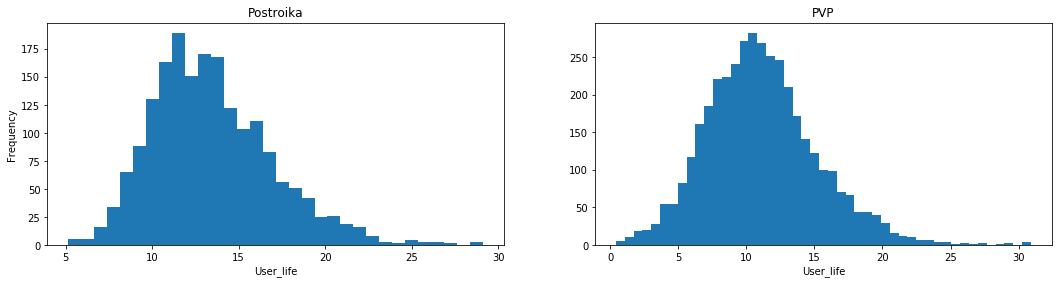

In [63]:
fig = plt.figure(figsize=(18, 9))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.hist(sample_1_1, bins='auto')
ax_2.hist(sample_1_2, bins='auto')

ax_1.set_title('Postroika')
ax_2.set_title('PVP')

ax_1.set_xlabel('User_life')
ax_2.set_xlabel('User_life')

ax_1.set_ylabel('Frequency')
ax_1.set_ylabel('Frequency')

plt.show()

In [64]:
from scipy import stats as st
import numpy as np

# check the variance of sample_1 and sample_2 to set equal_var = True
variance_1 = np.var(sample_1_1, ddof = 1)
variance_2 = np.var(sample_1_2, ddof = 1)
print('var_1: {:.3f}'.format(variance_1))
print('var_2: {:.3f}'.format(variance_2))
print('Difference of var1 and var_2 = {:.0%}'.format(variance_1 / variance_2))
print()

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1_1, sample_1_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

var_1: 12.304
var_2: 16.775
Difference of var1 and var_2 = 73%

p-значение: 5.708058235070849e-107
Отвергаем нулевую гипотезу


In [65]:
print('Медианное время прохождения при постройке', sample_1_1.median())

Медианное время прохождения при постройке 13.031724537037036


In [66]:
print('Медианное время прохождения при пвп', sample_1_2.median())


Медианное время прохождения при пвп 10.792789351851852


<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Посчитано корректно. Отдельный лайк за сравнение дисперсий)
</div>


**Проверить гипотезу о равенстве жизненного цикла пользователей, которые достигли первого уровня и которые не достигли первого уровня.**

In [67]:
# id пользователей которые не завершили 1й этап
userid_level_0 = game_actions_C[game_actions_C['event'] != "finished_stage_1"]['user_id']

In [68]:
failed = game_actions_clean[game_actions_clean['user_id'].isin(userid_level_0)].sort_values(by = ['event_datetime','user_id'], ascending = True)
failed = failed.merge(min_max_user_date, left_on='user_id', right_on='user_id')
failed = failed[failed['user_level'] == 0]
failed.head()

,event_datetime,event,building_type,user_id,project_type,user_level,max,min,life
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-10 20:27:01,2020-05-04 00:00:01,6.852083
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-10 20:27:01,2020-05-04 00:00:01,6.852083
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-10 20:27:01,2020-05-04 00:00:01,6.852083
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-10 20:27:01,2020-05-04 00:00:01,6.852083
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,0,2020-05-10 20:27:01,2020-05-04 00:00:01,6.852083


In [69]:
success = game_actions_clean[game_actions_clean['user_id'].isin(userid_level_1)].sort_values(by = ['event_datetime','user_id'], ascending = True)
success = success.merge(min_max_user_date, left_on='user_id', right_on='user_id')
success = success[success['user_level'] == 0]
success.head()

,event_datetime,event,building_type,user_id,project_type,user_level,max,min,life
0,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,0,2020-05-15 05:29:13,2020-05-04 00:00:03,11.228588
1,2020-05-06 23:49:25,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,0,2020-05-15 05:29:13,2020-05-04 00:00:03,11.228588
2,2020-05-07 03:56:30,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,0,2020-05-15 05:29:13,2020-05-04 00:00:03,11.228588
3,2020-05-07 07:58:20,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,0,2020-05-15 05:29:13,2020-05-04 00:00:03,11.228588
4,2020-05-07 08:30:13,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,0,2020-05-15 05:29:13,2020-05-04 00:00:03,11.228588


**сформируем первую гипотезу #2**

`H0:` время жизни одинаково

`H1:` время жизни различается

In [70]:
sample_2_1 = success['life']
sample_2_2 = failed['life']

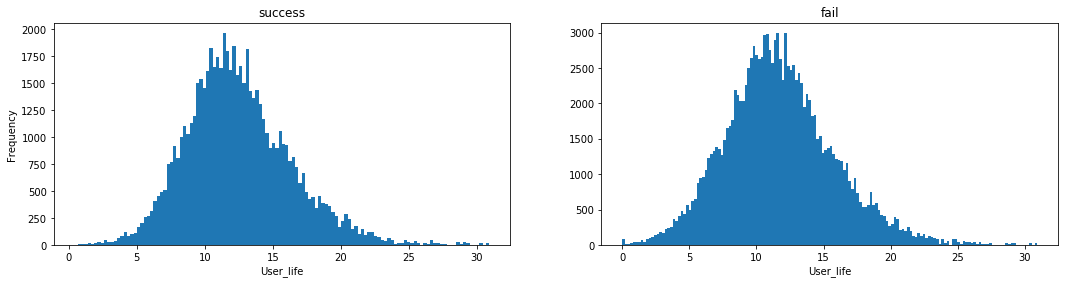

In [71]:
fig = plt.figure(figsize=(18, 9))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.hist(sample_2_1, bins='auto')
ax_2.hist(sample_2_2, bins='auto')

ax_1.set_title('success')
ax_2.set_title('fail')

ax_1.set_xlabel('User_life')
ax_2.set_xlabel('User_life')

ax_1.set_ylabel('Frequency')
ax_1.set_ylabel('Frequency')

plt.show()

In [72]:
from scipy import stats as st
import numpy as np

# check the variance of sample_1 and sample_2 to set equal_var = True
variance_2_1 = np.var(sample_2_1, ddof = 1)
variance_2_2 = np.var(sample_2_2, ddof = 1)
print('var_2_1: {:.3f}'.format(variance_1))
print('var_2_2: {:.3f}'.format(variance_2))
print('Difference of var1 and var_2 = {:.0%}'.format(variance_2_1 / variance_2_2))
print()

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_2_1, sample_2_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

var_2_1: 12.304
var_2_2: 16.775
Difference of var1 and var_2 = 90%

p-значение: 6.46369786800465e-310
Отвергаем нулевую гипотезу


In [73]:
print('Период жизни пользователей завершивших первый уровень', sample_2_1.median())

Период жизни пользователей завершивших первый уровень 12.086782407407407


In [74]:
print('Период жизни пользователей НЕ завершивших первый уровень', sample_2_2.median())

Период жизни пользователей НЕ завершивших первый уровень 11.458657407407408


<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Хорошая гипотеза
</div>


# Выводы проверка гипотез

Гипотеза 1: Мы получили статистически значимый результат, что время прохождения первого уровня у пользователей делающих постройку и пользователей, выигрывающих в бидтвах, одинаково, т.е. вероятность наступления такого события крайне мала. В основном время прохождения отличается.

Гипотеза 2: Мы получили статистически значимый результат, что время время жизни пользователей на первом уровне заверших уровень и не завершивших уровень, одинаково, т.е. вероятность наступления такого события крайне мала. В основном время жизни таких пользователей отличается.

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Теперь понятно, почему игроки выбирают эту стратегию - так получается сэкономить время
</div>


# Выводы по проекту

**сформировать вывод в какой момент пользователю показать рекламу или предложить покупку**


- Первый показ рекламы на этапе 4, примерно через - 3.46 дня
- Второй показ рекламы на этапе 6, примерно через - 5.01 дня
- Третий показ рекламы на этапе 9, примерно через - 7.33 дня
- Четвертый показ рекламы на этапе 10, примерно через - 8.12 дня
- Пятый показ рекламы на этапе 11, примерно через - 8.85 дня
- Шестой показ рекламы на этапе 12, примерно через - 9.62 дня
- Седьмой показ рекламы на этапе 13, примерно через - 10.37 дня

**сформировать вывод в какая должна быть цена показа рекламы или цена покупки пользователя**


Рассчитаны различные сценарии работы компании. Отдел маркетинга должен выбрать преемлемый.

--- Расчет при сценарии Margin = 0.00% ---

- Profit = 0.0
- CPAcq = 0.56
- ARPU = 0.56
- Прибыль / Убыток с пользователя = 0.0
- стоимость 1 показа рекламы одному пользователю =  0.08

--- Расчет при сценарии Margin = 10.00% ---

- Profit = 760.35
- CPAcq = 0.56
- ARPU = 0.62
- Прибыль / Убыток с пользователя = 0.06
- стоимость 1 показа рекламы одному пользователю =  0.089

--- Расчет при сценарии Margin = 20.00% ---

- Profit = 1520.71
- CPAcq = 0.56
- ARPU = 0.67
- Прибыль / Убыток с пользователя = 0.11
- стоимость 1 показа рекламы одному пользователю =  0.096

--- Расчет при сценарии Margin = 30.00% ---

- Profit = 2281.07
- CPAcq = 0.56
- ARPU = 0.73
- Прибыль / Убыток с пользователя = 0.17
- стоимость 1 показа рекламы одному пользователю =  0.104

--- Расчет при сценарии Margin = 40.00% ---

- Profit = 3041.43
- CPAcq = 0.56
- ARPU = 0.78
- Прибыль / Убыток с пользователя = 0.22
- стоимость 1 показа рекламы одному пользователю =  0.111

**найти и объяснить лучшие каналы привлечения трафика**

На youtube_channel_reklama + yandex_direct требуется сфокусировать основню часть бюджета, 50-70%
Оставшийся распределить на instagram_new_adverts и facebook_ads, с приоритетом на instagram_new_adverts.

**Презентация:**

https://www.dropbox.com/s/048npx522s7ynts/Final.pdf?dl=0

**Dashboard:**

https://public.tableau.com/views/Final_project_16192965703030/Spacebrothers?:language=en&:display_count=y&publish=yes&:origin=viz_share_link

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2

Спасибо за работу! Она выполнена на высоком уровне - последовательно, с достаточным кол-вом визуализаций и комментариев. Мне очень понравилось то, как ты собираешь все ключевые моменты (выводы, рекомендации) в каждом блоке. А итоговые выводы - просто замечательные. С одной стороны достаточно краткие, чтобы с ними можно было быстро ознакомиться, с другой стороны - они полносью описывают все полученные в ходе исследования результаты.
    
Здорово, что ты не только рассчитал несколько вариантов монетизации, но и провел исследование по маркетинговым затратам. Теперь мы сможем не только внедрить монетизацию в нашу игру достаточно безболезненным способом, но и снизить затраты на привлечение (или привлекать больше новых игроков).
    
Спасибо за крутейшие выводы!
    
    
Я также посмотрела дашборд - он полностью соответствует ТЗ, в нем есть все элементы - графики, фильтрация
    
По презентации есть пара некритичных замечаний:
1. Нет закрывающего слайда
2. скриншоты из тетрадки выглядят немного "шакалисто" и бросаются в глаза. Расчеты прибыли я бы расписала отдельно в самой презентации. Для документа такой формат нормальный, но для презентации сложноват для восприятия.
    
Мне понравился слайд с рекомендацией по трафику. Очень компактно удалось разместить наблюдения и выводы)
    
Поздравляю с завершением курса! Успехов в дальнейшей работе!    

</div>
